<a href="https://colab.research.google.com/github/Shoukhin1803078/Heart-diseases-prediction-Machine-learning-/blob/main/Heart_disease_detection_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# New Section

In [ ]:
# loading the csv data to a Pandas DataFrame
data = pd.read_csv('/content/heart_disease_data.csv')

# New Section

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
data.shape

(303, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# checking for missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
#Splitting the Features and Target
X = data.drop(columns='target',axis=1)
Y= data['target']
print(X)


     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
#20% data niyesi test korar jonno r baki 80% data niyesi  model take train korar jonno

In [ ]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
61,54,1,1,108,309,0,1,156,0,0.0,2,0,3
238,77,1,0,125,304,0,0,162,1,0.0,2,3,2
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,42,1,3,148,244,0,0,178,0,0.8,2,2,2
49,53,0,0,138,234,0,0,160,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
194,60,1,2,140,185,0,0,155,0,3.0,1,0,2


In [ ]:
Y_train

61     1
238    0
160    1
158    1
289    0
      ..
100    1
49     1
300    0
194    0
131    1
Name: target, Length: 242, dtype: int64

In [ ]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2
83,52,1,3,152,298,1,1,178,0,1.2,1,0,3
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,45,1,0,104,208,0,0,148,1,3.0,1,0,2
187,54,1,0,124,266,0,0,109,1,2.2,1,1,3
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
122,41,0,2,112,268,0,0,172,1,0.0,2,0,2


In [ ]:
Y_test

255    0
72     1
83     1
268    0
92     1
      ..
42     1
187    0
8      1
122    1
19     1
Name: target, Length: 61, dtype: int64

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


In [ ]:
model=LogisticRegression()
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#accuracy on training data
prediction=model.predict(X_test)
print(prediction)
#accuracy ber korar niyom duivabe

y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

#accuracy=accuracy_score(model.predict(X_train),Y_train)
#print(accuracy)


[0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1
 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 1 1]
Accuracy: 0.819672131147541


In [ ]:
accuracy=accuracy_score(model.predict(X_test),Y_test)
print(accuracy)

0.819672131147541


In [ ]:
#input_data=(62,0,0,140,268,0,0,160,0,3.6,0,2,2)
#numpy_array=np.asarray(input_data)
#reshaped=numpy_array.reshape(1,-1)
#prediction=model.predict(reshaped)
#print(prediction)

input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


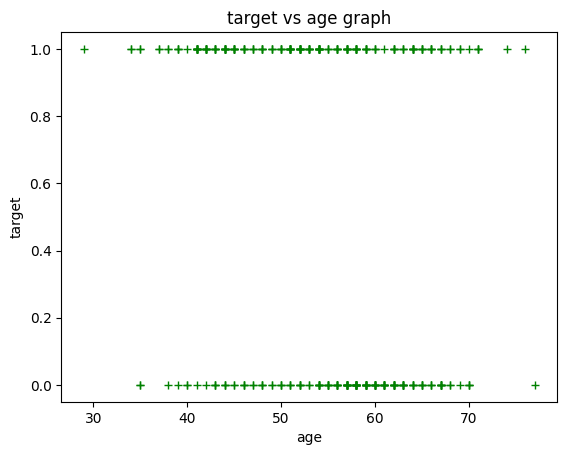

In [ ]:
%matplotlib inline
plt.title("target vs age graph")
plt.xlabel('age')
plt.ylabel('target')
x=data.age
y=data.target
#plt.plot(x,y)
plt.plot(x,y,'g+')
#plt.plot(x,y,color='red',linewidth='1',linestyle='dotted')
#plt.scatter(data.chol, data.target)
#plt.bar(data.age, data.target)

Text(0.5, 1.0, 'trestbps')

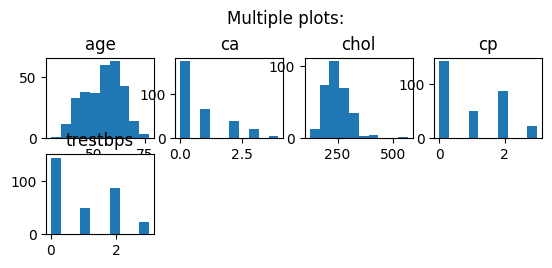

In [ ]:
%matplotlib inline
plt.suptitle("Multiple plots:")

x1=data.age
x2=data.ca
x3=data.chol
x4=data.cp

x5=data.trestbps
x6=data.chol
x7=data.fbs
x8=data.restecg



plt.subplot(4,4,1)
plt.hist(x1)
plt.title("age")


plt.subplot(4,4,2)
plt.hist(x2)
plt.title("ca")


plt.subplot(4,4,3)
plt.hist(x3)
plt.title("chol")


plt.subplot(4,4,4)
plt.hist(x4)
plt.title("cp")


plt.subplot(4,4,5)
plt.hist(x4)
plt.title("trestbps")



In [ ]:
data.head()

In [ ]:
#-----------------SVM ----------------

from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, Y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6229508196721312
